# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")







Number of cities in the list: 608


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url+"&q="+city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        #response = requests.get(city_url + city).json()
  

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kailua-kona
Processing Record 2 of Set 1 | montepuez
Processing Record 3 of Set 1 | boyolangu
Processing Record 4 of Set 1 | wailua homesteads
Processing Record 5 of Set 1 | port augusta
Processing Record 6 of Set 1 | xiaoweizhai
Processing Record 7 of Set 1 | saint charles
Processing Record 8 of Set 1 | georgetown
Processing Record 9 of Set 1 | saipan
Processing Record 10 of Set 1 | waitangi
Processing Record 11 of Set 1 | mount pearl
Processing Record 12 of Set 1 | hithadhoo
Processing Record 13 of Set 1 | vega de alatorre
Processing Record 14 of Set 1 | bethel
Processing Record 15 of Set 1 | olonkinbyen
Processing Record 16 of Set 1 | iqaluit
Processing Record 17 of Set 1 | pisco
Processing Record 18 of Set 1 | papatowai
Processing Record 19 of Set 1 | brookings
Processing Record 20 of Set 1 | new norfolk
Processing Record 21 of Set 1 | port alfred
Processing Record 22 of Set 1 | port mathurin

Processing Record 40 of Set 4 | mgandu
Processing Record 41 of Set 4 | kapuskasing
Processing Record 42 of Set 4 | thompson
Processing Record 43 of Set 4 | baruun-urt
Processing Record 44 of Set 4 | villa hernandarias
Processing Record 45 of Set 4 | sidney
Processing Record 46 of Set 4 | kilindoni
Processing Record 47 of Set 4 | severo-yeniseyskiy
Processing Record 48 of Set 4 | jamestown
Processing Record 49 of Set 4 | isafjordur
Processing Record 0 of Set 5 | iskateley
Processing Record 1 of Set 5 | huarmey
Processing Record 2 of Set 5 | stanley
Processing Record 3 of Set 5 | vorgashor
Processing Record 4 of Set 5 | sansanne-mango
Processing Record 5 of Set 5 | san jose village
City not found. Skipping...
Processing Record 6 of Set 5 | bikenibeu village
Processing Record 7 of Set 5 | taperoa
Processing Record 8 of Set 5 | balikpapan
Processing Record 9 of Set 5 | guerrero negro
Processing Record 10 of Set 5 | herzliya pituah
City not found. Skipping...
Processing Record 11 of Set 5 |

Processing Record 23 of Set 8 | flying fish cove
Processing Record 24 of Set 8 | verkhnevilyuysk
Processing Record 25 of Set 8 | melito di porto salvo
Processing Record 26 of Set 8 | kokshetau
Processing Record 27 of Set 8 | daru
Processing Record 28 of Set 8 | medina
Processing Record 29 of Set 8 | sittwe
Processing Record 30 of Set 8 | antsiranana
Processing Record 31 of Set 8 | curillo
Processing Record 32 of Set 8 | antonio enes
Processing Record 33 of Set 8 | zouerate
Processing Record 34 of Set 8 | san rafael del sur
Processing Record 35 of Set 8 | kimbe
Processing Record 36 of Set 8 | zaragoza
Processing Record 37 of Set 8 | marrakesh
Processing Record 38 of Set 8 | okhotsk
Processing Record 39 of Set 8 | turpan
Processing Record 40 of Set 8 | puerto baquerizo moreno
Processing Record 41 of Set 8 | honiara
Processing Record 42 of Set 8 | valdivia
Processing Record 43 of Set 8 | dudinka
Processing Record 44 of Set 8 | palmer
Processing Record 45 of Set 8 | codrington
Processing R

Processing Record 11 of Set 12 | mirabad
Processing Record 12 of Set 12 | bada
Processing Record 13 of Set 12 | concordia
Processing Record 14 of Set 12 | baranovichi
Processing Record 15 of Set 12 | poronaysk
Processing Record 16 of Set 12 | fedorovskiy
Processing Record 17 of Set 12 | kolonia
Processing Record 18 of Set 12 | waingapu
Processing Record 19 of Set 12 | fuvahmulah
City not found. Skipping...
Processing Record 20 of Set 12 | castillos
Processing Record 21 of Set 12 | papao
Processing Record 22 of Set 12 | rantoul
Processing Record 23 of Set 12 | letlhakeng
Processing Record 24 of Set 12 | puerto ayacucho
Processing Record 25 of Set 12 | bermejillo
Processing Record 26 of Set 12 | volgodonsk
Processing Record 27 of Set 12 | ashburton
Processing Record 28 of Set 12 | deir ez-zor
Processing Record 29 of Set 12 | guiuan
Processing Record 30 of Set 12 | fisterra
Processing Record 31 of Set 12 | rojhan
Processing Record 32 of Set 12 | khuzdar
Processing Record 33 of Set 12 | lu

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          573
Lat           573
Lng           573
Max Temp      573
Humidity      573
Cloudiness    573
Wind Speed    573
Country       573
Date          573
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kailua-kona,19.6406,-155.9956,24.98,87,100,0.45,US,1700475844
1,montepuez,-13.1256,38.9997,35.90,25,0,3.06,MZ,1700475846
2,boyolangu,-8.1181,111.8935,27.25,77,75,4.36,ID,1700475848
3,wailua homesteads,22.0669,-159.3780,21.44,89,100,9.77,US,1700475850
4,port augusta,-32.5000,137.7667,18.05,76,100,8.48,AU,1700475852


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [2]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kailua-kona,19.6406,-155.9956,24.98,87,100,0.45,US,1700475844
1,montepuez,-13.1256,38.9997,35.90,25,0,3.06,MZ,1700475846
2,boyolangu,-8.1181,111.8935,27.25,77,75,4.36,ID,1700475848
3,wailua homesteads,22.0669,-159.3780,21.44,89,100,9.77,US,1700475850
4,port augusta,-32.5000,137.7667,18.05,76,100,8.48,AU,1700475852


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

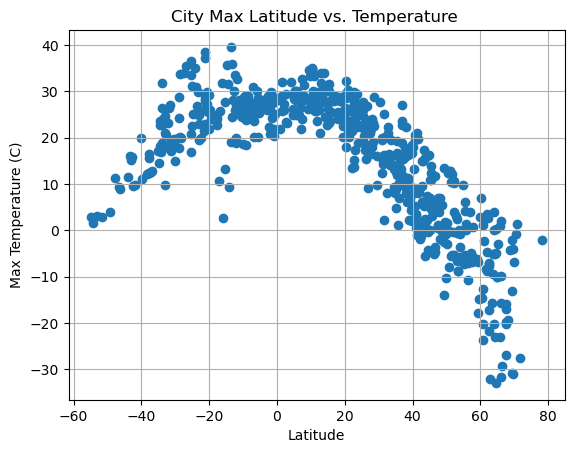

In [49]:
# Build a scatter plot for each data type
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o")
x_value1 = city_data_df["Lat"]
y_value1 = city_data_df["Max Temp"]

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature ")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

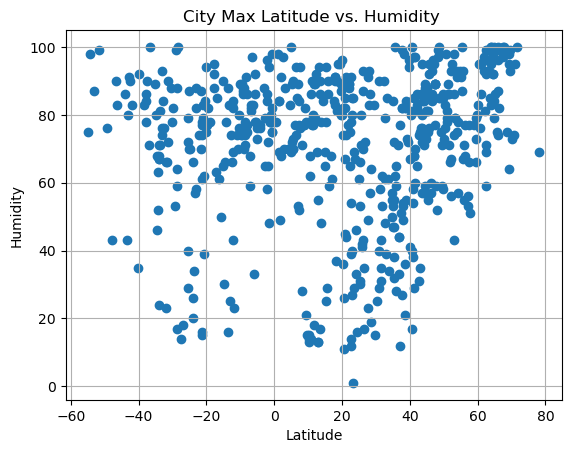

In [50]:
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o")
x_value2 = city_data_df["Lat"]
y_value2 = city_data_df["Humidity"]
# Incorporate the other graph properties
plt.title("City Max Latitude vs. Humidity ")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

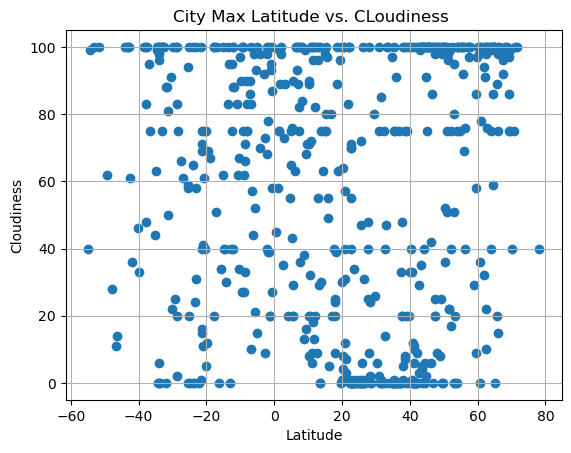

In [51]:
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o")
x_value3 = city_data_df["Lat"]
y_value3 = city_data_df["Cloudiness"]
# Incorporate the other graph properties
plt.title("City Max Latitude vs. CLoudiness ")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

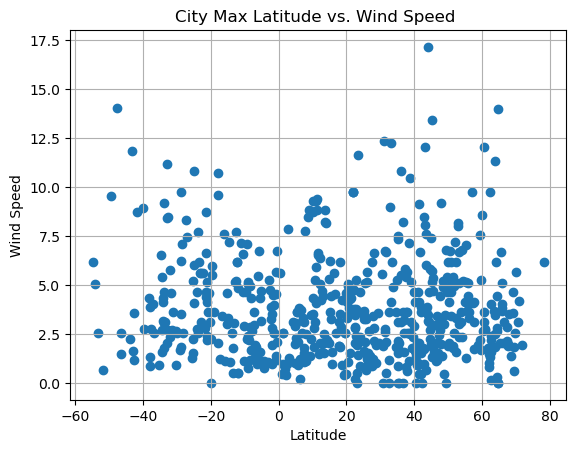

In [52]:
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o")
x_value4 = city_data_df["Lat"]
y_value4 = city_data_df["Wind Speed"]
# Incorporate the other graph properties
plt.title("City Max Latitude vs. Wind Speed ")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [53]:
#regression for Max temp
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_value1, y_value1)
print ((slope, intercept, rvalue, pvalue, stderr))

(-0.3044992076443393, 20.878362480864055, -0.6645317673861881, 2.8335374196235322e-74, 0.014329271460096651)


In [54]:
# Get regression values
regress_values = x_value1 * slope + intercept
print(regress_values)

City_ID
0      14.897815
1      24.875097
2      23.350317
3      14.159009
4      30.774587
         ...    
568    15.224817
569    10.993100
570     6.556455
571    16.234750
572    27.467817
Name: Lat, Length: 573, dtype: float64


In [55]:
# Create line equation string
line_eq1 = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq1)

y = -0.3x +20.88


The r-value is: 0.44160246986541085


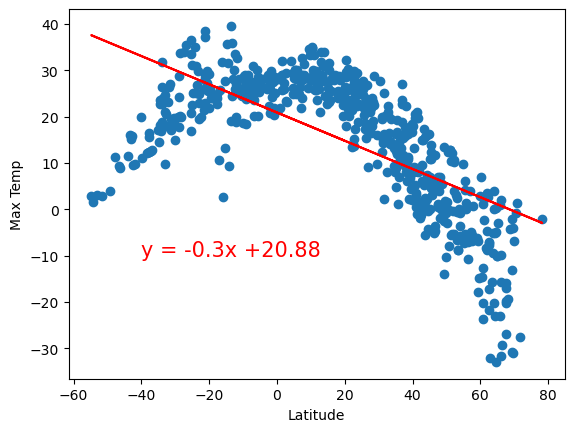

In [56]:

plt.scatter(x_value1,y_value1)
plt.plot(x_value1,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq1,(-40,-10),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

In [57]:
# Line Regression Humidity vs Lat
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_value2, y_value2)
print ((slope, intercept, rvalue, pvalue, stderr))
regress_values = x_value2 * slope + intercept
# Create line equation string
line_eq2 = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq2)
print(regress_values)


(0.0834386107360682, 69.57478516339529, 0.11771402142756075, 0.004780981359961056, 0.02945715852384938)
y = 0.08x +69.57
City_ID
0      71.213570
1      68.479603
2      68.897422
3      71.416017
4      66.863030
         ...    
568    71.123965
569    72.283536
570    73.499262
571    70.847224
572    67.769149
Name: Lat, Length: 573, dtype: float64


In [58]:
#Line Regresasion Cloudiness vs Lat
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_value3, y_value3)
print ((slope, intercept, rvalue, pvalue, stderr))
regress_values = x_value3 * slope + intercept
# Create line equation string
line_eq3 = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq3)
print(regress_values)


(-0.01123995777202514, 56.795005356171785, -0.008919830617877645, 0.8312835184666926, 0.052731817501370105)
y = -0.01x +56.8
City_ID
0      56.574246
1      56.942537
2      56.886252
3      56.546974
4      57.160304
         ...    
568    56.586316
569    56.430111
570    56.266342
571    56.623596
572    57.038241
Name: Lat, Length: 573, dtype: float64


In [59]:
#Line Regression for Wind Speed vs Lat
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_value4, y_value4)
print ((slope, intercept, rvalue, pvalue, stderr))
regress_values = x_value4 * slope + intercept
# Create line equation string
line_eq4 = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq4)
print(regress_values)


(-0.004961501737633742, 3.8875398146148186, -0.05795521971147017, 0.1659199317128586, 0.0035766130238549204)
y = -0.0x +3.89
City_ID
0      3.790093
1      3.952663
2      3.927818
3      3.778055
4      4.048789
         ...   
568    3.795421
569    3.726470
570    3.654179
571    3.811877
572    3.994908
Name: Lat, Length: 573, dtype: float64


In [60]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kailua-kona,19.6406,-155.9956,24.98,87,100,0.45,US,1700475844
3,wailua homesteads,22.0669,-159.3780,21.44,89,100,9.77,US,1700475850
5,xiaoweizhai,26.1903,107.5125,15.31,70,0,1.42,CN,1700475854
6,saint charles,38.7667,-90.7335,10.85,55,100,2.57,US,1700475587
7,georgetown,5.4112,100.3354,29.97,70,20,3.60,MY,1700475858


In [61]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,montepuez,-13.1256,38.9997,35.90,25,0,3.06,MZ,1700475846
2,boyolangu,-8.1181,111.8935,27.25,77,75,4.36,ID,1700475848
4,port augusta,-32.5000,137.7667,18.05,76,100,8.48,AU,1700475852
9,waitangi,-43.9535,-176.5597,11.57,86,100,2.24,NZ,1700475861
11,hithadhoo,-0.6000,73.0833,28.00,75,58,6.76,MV,1700475864


###  Temperature vs. Latitude Linear Regression Plot

y = -0.71x +37.13
City_ID
0      23.200331
3      21.478972
5      18.553592
6       9.631162
7      33.295495
         ...    
567     2.756725
568    23.962218
569    14.102664
570     3.765646
571    26.315278
Name: Lat, Length: 402, dtype: float64
The r-value is: 0.7917746446810712


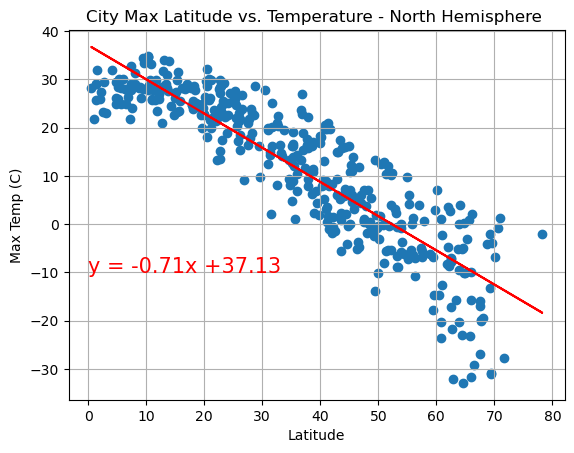

In [62]:
# Temperature vs. Latitute on Northern Hemisphere
# Build a scatter plot for each data type
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], marker="o")

x_value1 = northern_hemi_df["Lat"]
y_value1 = northern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_value1, y_value1)
regress_values = x_value1 * slope + intercept

plt.plot(x_value1,regress_values,"r-")

# Create line equation string
line_eq1 = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq1)
print(regress_values)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature - North Hemisphere ")
plt.ylabel("Max Temp (C)")
plt.xlabel("Latitude")
plt.annotate(line_eq1,(0,-10),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")

plt.grid(True)

# Save the figure
plt.savefig("RegresNorth-1.png")

# Show plot
plt.show()

City_ID
1      25.563922
2      27.179342
4      19.313737
9      15.618836
11     29.604682
         ...    
537    24.072090
539    22.025385
543    17.583762
552    20.135303
572    22.817078
Name: Lat, Length: 171, dtype: float64
City_ID
1     -13.1256
2      -8.1181
4     -32.5000
9     -43.9535
11     -0.6000
        ...   
537   -17.7500
539   -24.0944
543   -37.8626
552   -29.9533
572   -21.6403
Name: Lat, Length: 171, dtype: float64
The r-value is: 0.3480655548387367


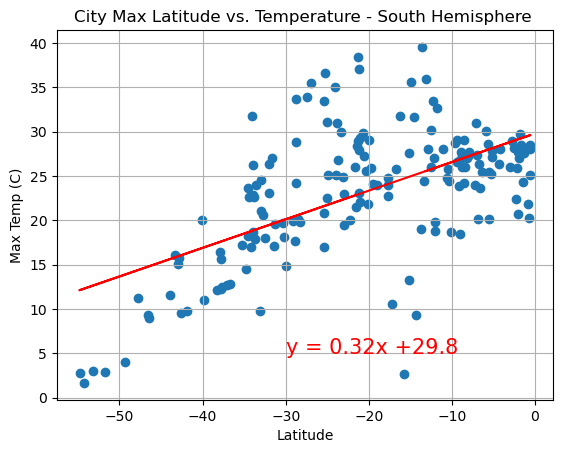

In [63]:
# Linear regression on Southern Hemisphere
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], marker="o")


x_value2 = southern_hemi_df["Lat"]
y_value2 = southern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_value2, y_value2)
regress_values = x_value2 * slope + intercept

plt.plot(x_value2,regress_values,"r-")

print (regress_values)
print (x_value2)

line_eq2 = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature - South Hemisphere ")
plt.ylabel("Max Temp (C)")
plt.xlabel("Latitude")
plt.annotate(line_eq2,(-30,5),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")

plt.grid(True)

# Save the figure
plt.savefig("RegresSouth-1.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** As you get closer to the Equator line the Temperatures increase, showed by a negative relationship between Max Temp and Latitute on the North Hemisphere and a positive relationship between Max Temp and Latitute in the South Hemisphere. 

### Humidity vs. Latitude Linear Regression Plot

City_ID
0      65.442184
3      66.265307
5      67.664173
6      71.930722
7      60.614853
         ...    
567    75.217958
568    65.077863
569    69.792528
570    74.735510
571    63.952671
Name: Lat, Length: 402, dtype: float64
City_ID
0      19.6406
3      22.0669
5      26.1903
6      38.7667
7       5.4112
        ...   
567    48.4564
568    18.5667
569    32.4640
570    47.0343
571    15.2500
Name: Lat, Length: 402, dtype: float64
y = 0.34x +58.78
The r-value is: 0.0789628341097641


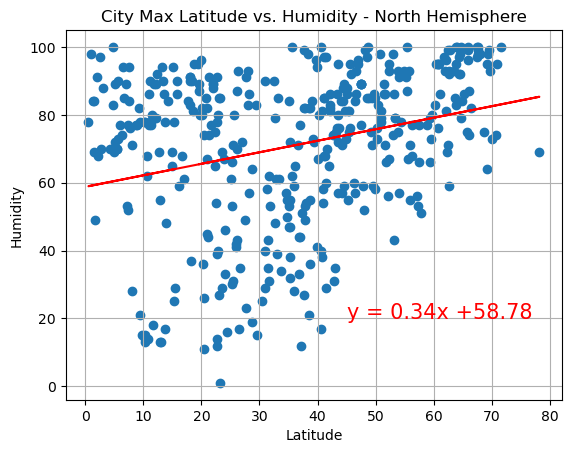

In [64]:
# Northern Hemisphere
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], marker="o")

x_value3 = northern_hemi_df["Lat"]
y_value3 = northern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_value3, y_value3)
regress_values = x_value3 * slope + intercept

plt.plot(x_value3,regress_values,"r-")

print (regress_values)
print (x_value3)

# Create line equation string
line_eq3 = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq3)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Humidity - North Hemisphere")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.annotate(line_eq3,(45,20),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")

plt.grid(True)

# Save the figure
plt.savefig("RegresNorth-2.png")

# Show plot
plt.show()

City_ID
1      72.120883
2      72.442368
4      70.877032
9      70.141709
11     72.925036
         ...    
537    71.823993
539    71.416678
543    70.532749
552    71.040532
572    71.574233
Name: Lat, Length: 171, dtype: float64
City_ID
1     -13.1256
2      -8.1181
4     -32.5000
9     -43.9535
11     -0.6000
        ...   
537   -17.7500
539   -24.0944
543   -37.8626
552   -29.9533
572   -21.6403
Name: Lat, Length: 171, dtype: float64
y = 0.06x +72.96
The r-value is: 0.001877922782400749


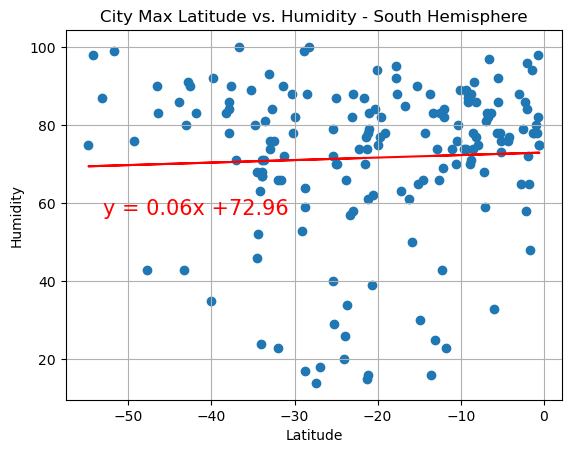

In [65]:
# Southern Hemisphere
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], marker="o")
x_value4 = southern_hemi_df["Lat"]
y_value4 = southern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_value4, y_value4)
regress_values = x_value4 * slope + intercept

plt.plot(x_value4,regress_values,"r-")

print (regress_values)
print (x_value4)

# Create line equation string
line_eq4 = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq4)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Humidity - South Hemisphere")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.annotate(line_eq4,(-53,57), fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")

plt.grid(True)

# Save the figure
plt.savefig("RegresSouth-2.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** In the North Hemisphere the is a soft posivite correlation between latitute and humidity, but it is not possible to define a linear relatioship between humidity and latitute in the south hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

City_ID
0      46.857439
3      47.866123
5      49.580340
6      54.808715
7      40.941864
         ...    
567    58.837005
568    46.410988
569    52.188500
570    58.245797
571    45.032139
Name: Lat, Length: 402, dtype: float64
City_ID
0      19.6406
3      22.0669
5      26.1903
6      38.7667
7       5.4112
        ...   
567    48.4564
568    18.5667
569    32.4640
570    47.0343
571    15.2500
Name: Lat, Length: 402, dtype: float64
y = 0.42x +38.69
The r-value is: 0.036982796696166935


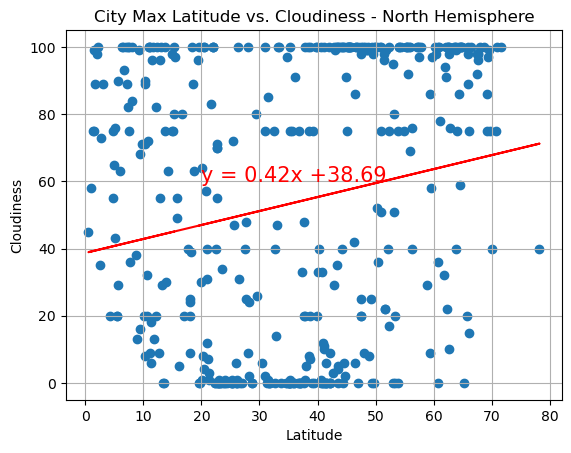

In [39]:
# Northern Hemisphere
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], marker="o")

x_value5 = northern_hemi_df["Lat"]
y_value5 = northern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_value5, y_value5)
regress_values = x_value5 * slope + intercept


plt.plot(x_value5,regress_values,"r-")

print (regress_values)
print (x_value5)

# Create line equation string
line_eq5 = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq5)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Cloudiness - North Hemisphere")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.annotate(line_eq5,(20,60),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")

plt.grid(True)

# Save the figure
plt.savefig("RegresNorth-3.png")

# Show plot
plt.show()

City_ID
1      63.669713
2      63.753401
4      63.345914
9      63.154495
11     63.879049
         ...    
537    63.592426
539    63.486394
543    63.256291
552    63.388476
572    63.527409
Name: Lat, Length: 171, dtype: float64
City_ID
1     -13.1256
2      -8.1181
4     -32.5000
9     -43.9535
11     -0.6000
        ...   
537   -17.7500
539   -24.0944
543   -37.8626
552   -29.9533
572   -21.6403
Name: Lat, Length: 171, dtype: float64
y = 0.02x +63.89
The r-value is: 4.4593436485296466e-05


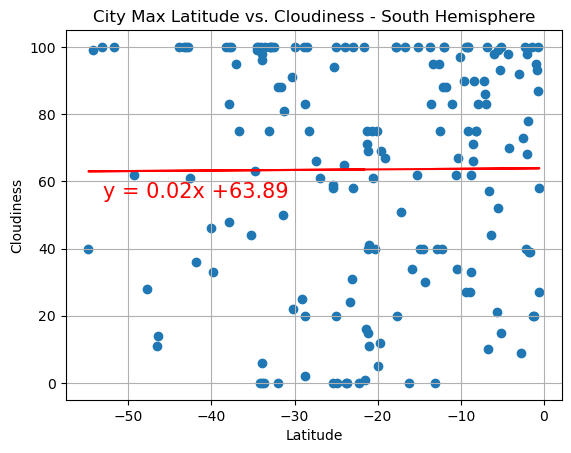

In [43]:
# Southern Hemisphere
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], marker="o")
x_value6 = southern_hemi_df["Lat"]
y_value6 = southern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_value6, y_value6)
regress_values = x_value6 * slope + intercept

plt.plot(x_value6,regress_values,"r-")

print (regress_values)
print (x_value6)

# Create line equation string
line_eq6 = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq6)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Cloudiness - South Hemisphere")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.annotate(line_eq6,(-53,55),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")

plt.grid(True)

# Save the figure
plt.savefig("RegresSouth-3.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** Cloudiness does not correlate with latitute regardles in any hemisphere. 

### Wind Speed vs. Latitude Linear Regression Plot

City_ID
0      3.624542
3      3.635004
5      3.652784
6      3.707012
7      3.563186
         ...   
567    3.748793
568    3.619911
569    3.679835
570    3.742661
571    3.605610
Name: Lat, Length: 402, dtype: float64
City_ID
0      19.6406
3      22.0669
5      26.1903
6      38.7667
7       5.4112
        ...   
567    48.4564
568    18.5667
569    32.4640
570    47.0343
571    15.2500
Name: Lat, Length: 402, dtype: float64
y = 0.0x +3.54
The r-value is: 0.0009193957783184571


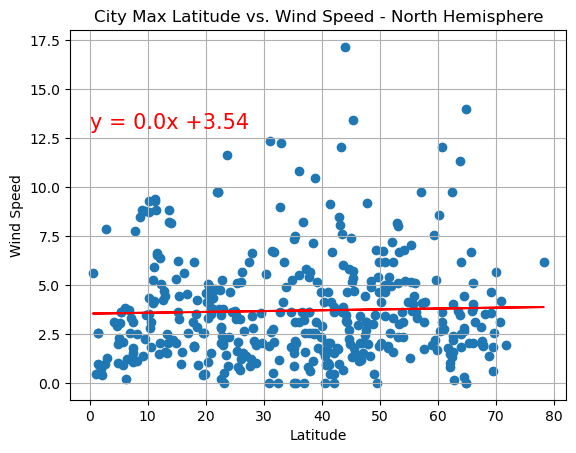

In [44]:
# Northern Hemisphere
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], marker="o")
x_value7 = northern_hemi_df["Lat"]
y_value7 = northern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_value7, y_value7)
regress_values = x_value7 * slope + intercept


plt.plot(x_value7,regress_values,"r-")

print (regress_values)
print (x_value7)

# Create line equation string
line_eq7 = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq7)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Wind Speed - North Hemisphere")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.annotate(line_eq7,(0,13),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")

plt.grid(True)

# Save the figure
plt.savefig("RegresNorth-4.png")

# Show plot
plt.show()

City_ID
1      3.746701
2      3.561892
4      4.461740
9      4.884447
11     3.284426
         ...   
537    3.917371
539    4.151520
543    4.659654
552    4.367750
572    4.060948
Name: Lat, Length: 171, dtype: float64
City_ID
1     -13.1256
2      -8.1181
4     -32.5000
9     -43.9535
11     -0.6000
        ...   
537   -17.7500
539   -24.0944
543   -37.8626
552   -29.9533
572   -21.6403
Name: Lat, Length: 171, dtype: float64
y = -0.04x +3.26
The r-value is: 0.03743440805309651


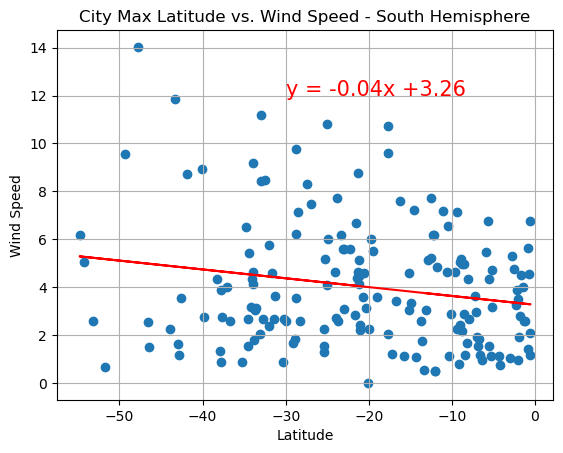

In [45]:
# Southern Hemisphere
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], marker="o")

x_value8 = southern_hemi_df["Lat"]
y_value8 = southern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_value8, y_value8)
regress_values = x_value8 * slope + intercept

plt.plot(x_value8,regress_values,"r-")

print (regress_values)
print (x_value8)

# Create line equation string
line_eq8 = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq8)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Wind Speed - South Hemisphere")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.annotate(line_eq8,(-30,12),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")

plt.grid(True)

# Save the figure
plt.savefig("RegresSouth-4.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** wind Speed does not fluctuate much on the latitudes evaluated for the north hemisphere and there is more of a variation in the south hemisphere with a tendency of slower wind speed closer to the Equator line. 